
각 시장별 업종 점유율을 시각화하여 현재 주목받고 있는 업종을 파악. (KOSPI, KOSDAQ 업종 나누는 방법 필요)

업종 나누기 : 네이버증권 업종탭에서, 각 업종별 목록을 받아옴

* 있는건 코스닥, * 없는건 코스피

데이터 전처리 : fdr.StockListing에 'Sector' 열 추가

Sector를 기반으로 groupby 하면 KOSPI, KOSDAQ 시장에서 업종별 점유율을 시각화 할 수 있음 

네이버 증권 업종 탭에서 업종 목록을 request, bs4, 안될시 selenium으로 받아옴

업종링크를 돌면서 종목명에 *이 있는것과 없는것으로 분류 -> 정규표현식 etc 등의 방법

fdr.StockListing 전처리 - kospi, kosdaq에 sector열을 추가 -> 위에서 구분한걸 기준으로 넣음

이를 기반으로 sector별 종목수를 계산 (value_counts())

이를 시각화

In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import FinanceDataReader as fdr

In [4]:
import koreanize_matplotlib

In [5]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

In [6]:
df = pd.read_csv('sector_by_stock_list_df.csv')

In [7]:
df.head()

,업종명,종목명,코스닥 여부
0,건강관리장비와용품,젠큐릭스,True
1,건강관리장비와용품,HLB,True
2,건강관리장비와용품,아스타,True
3,건강관리장비와용품,바이오프로테크,False
4,건강관리장비와용품,노보믹스,False


In [8]:
kospi = fdr.StockListing('KOSPI')
kosdaq = fdr.StockListing('KOSDAQ')
etfs = fdr.StockListing('ETF/KR')

In [9]:
kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,53700,1,100,0.19,53500,54100,53200,10747196,576022861800,320577322935000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,174500,1,4400,2.59,170100,176000,170000,2643523,459886497400,127036412692500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,348000,1,3500,1.02,341000,350500,340500,200696,69426924500,81432000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,934000,2,-3000,-0.32,933000,940000,920000,35257,32796380000,66476516000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,215000,2,-2500,-1.15,217000,217500,213500,391681,84299329000,45024481065000,209416191,STK


In [ ]:
df['코스닥 여부']

In [21]:
# KOSPI와 KOSDAQ에 'Sector' 열 추가 (초기값 None)

kospi['Sector'] = None
kosdaq['Sector'] = None

# 업종명 할당
for index in range(len(df)):
    stock_name = df['종목명'][index]
    sector_name = df['업종명'][index]
    market = df['코스닥 여부'][index]
        
    if market:  # KOSDAQ인 경우
        if stock_name in kosdaq['Name'].values:
            kosdaq.loc[kosdaq['Name'] == stock_name, 'Sector'] = sector_name
    else:  # KOSPI인 경우
        if stock_name in kospi['Name'].values:
            kospi.loc[kospi['Name'] == stock_name, 'Sector'] = sector_name

In [48]:
kospi_sector_cnt = kospi['Sector'].value_counts().sort_values(ascending=True)
kospi_sector_cnt_df = pd.DataFrame(kospi_sector_cnt)
kospi_sector_cnt_df.head()

,count
Sector,
문구류,1
창업투자,1
사무용전자제품,1
담배,1
인터넷과카탈로그소매,1


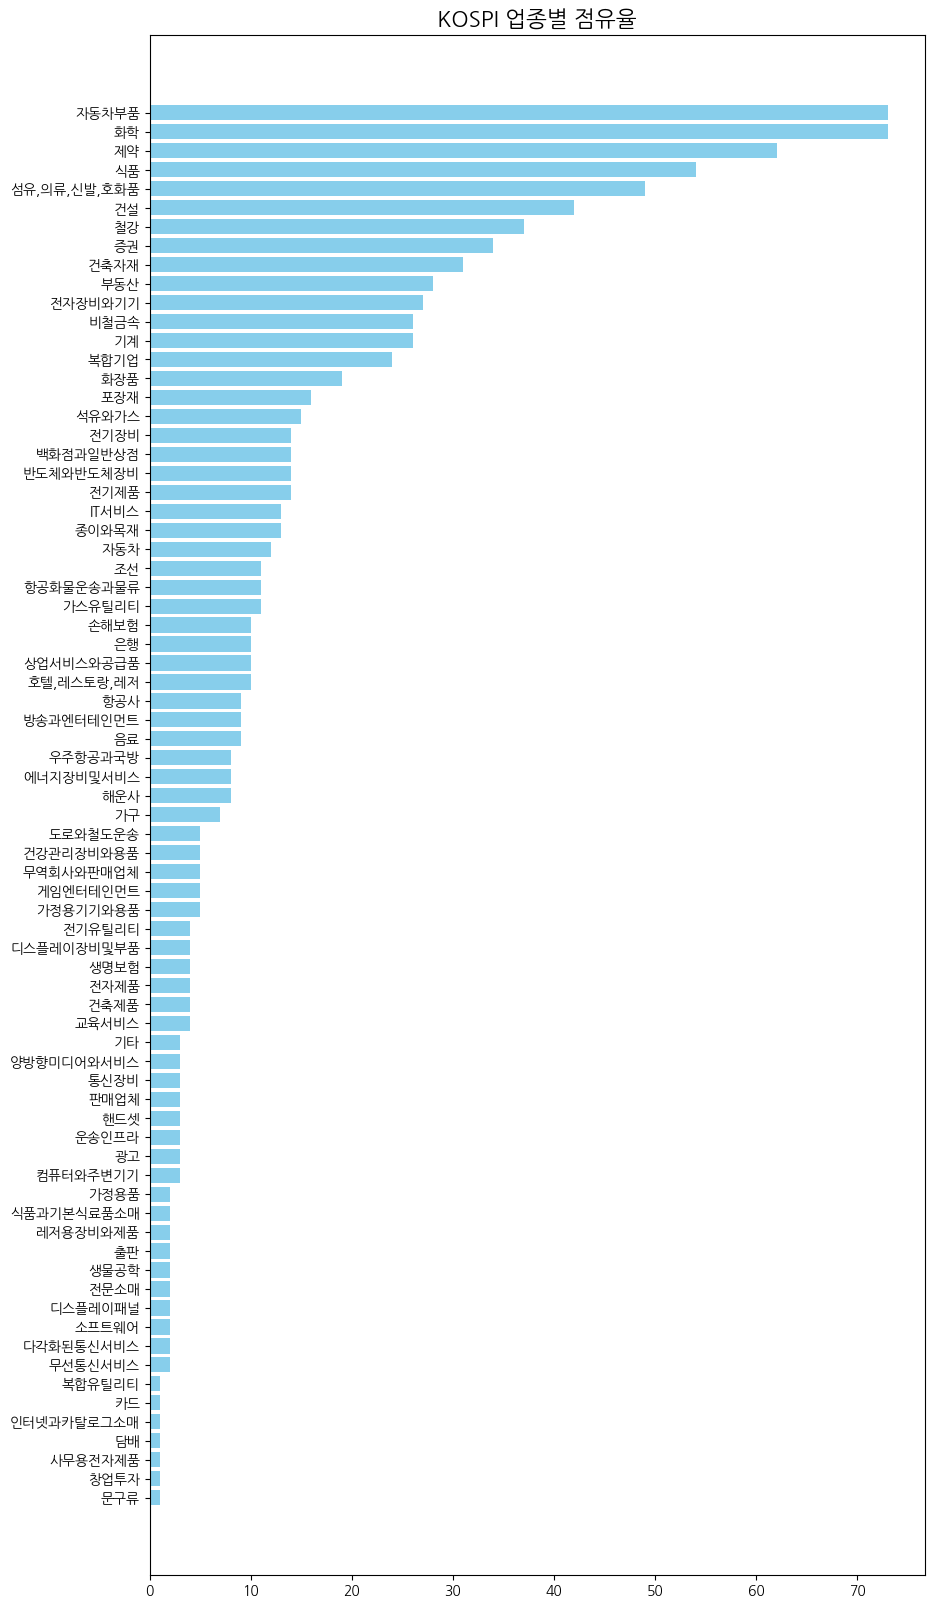

In [51]:
# KOSPI 업종별 점유율 파악

plt.figure(figsize=(10,20))
plt.barh(kospi_sector_cnt_df.index, kospi_sector_cnt_df['count'], color='skyblue')
plt.title('KOSPI 업종별 점유율', fontsize=16)
plt.show()


In [52]:
kosdaq_sector_cnt = kosdaq['Sector'].value_counts().sort_values(ascending=True)
kosdaq_sector_cnt_df = pd.DataFrame(kosdaq_sector_cnt)
kosdaq_sector_cnt_df.head()

,count
Sector,
다각화된소비자서비스,1
은행,1
무선통신서비스,1
다각화된통신서비스,1
복합기업,1


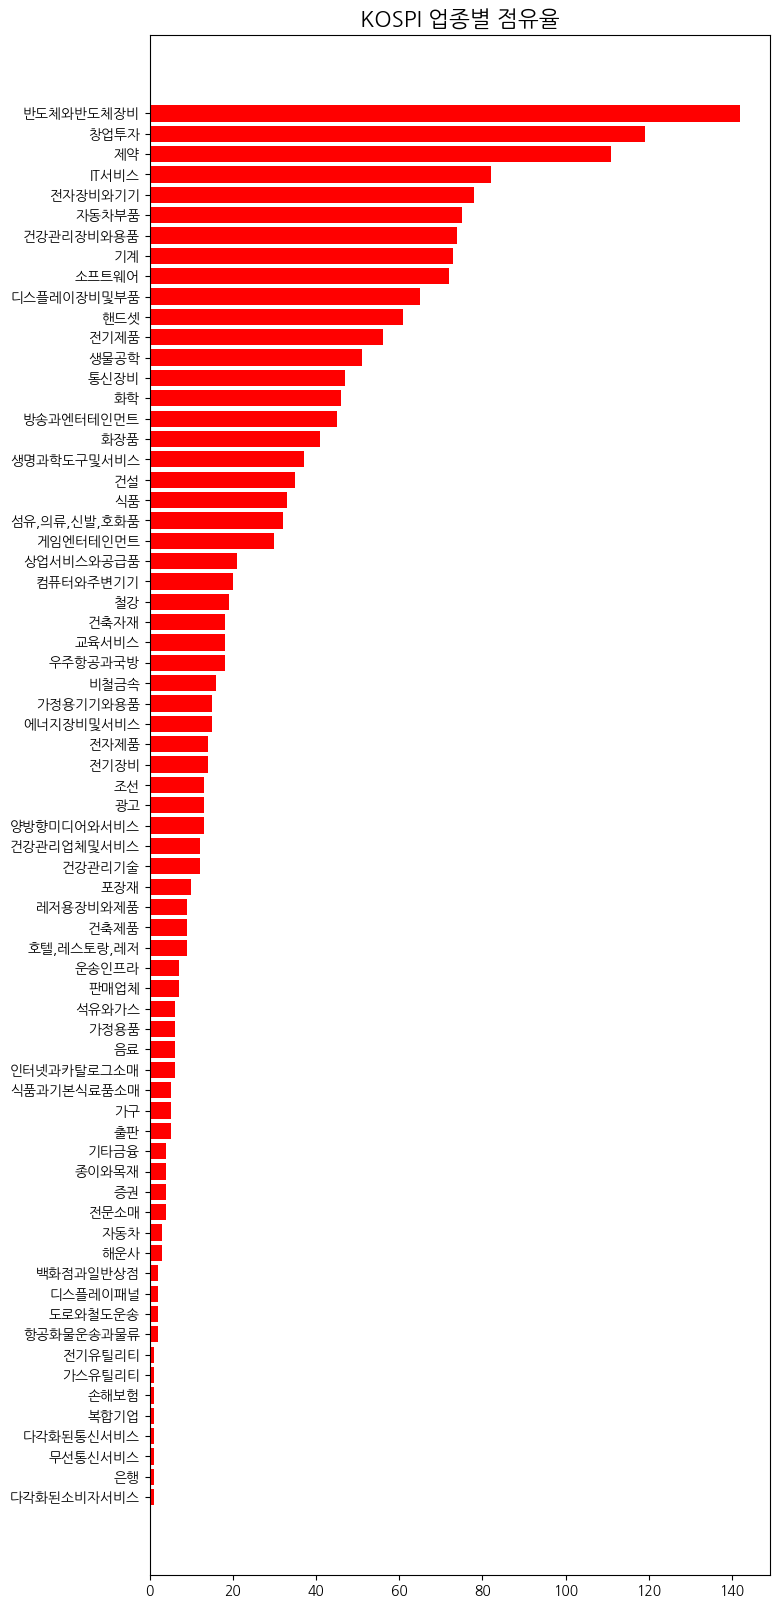

In [55]:
# KOSDAQ 업종별 점유율 파악

plt.figure(figsize=(8,20))
plt.barh(kosdaq_sector_cnt_df.index, kosdaq_sector_cnt_df['count'], color='red')
plt.title('KOSPI 업종별 점유율', fontsize=16)
plt.show()


In [56]:
etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1058490,2,285,0.03,1058338.0,0.8412,214710,227267,90621
1,360750,4,TIGER 미국S&P500,22015,5,-40,-0.18,22178.0,16.9517,4347687,96282,70833
2,357870,6,TIGER CD금리투자KIS(합성),55475,2,15,0.03,55474.0,0.8269,338061,18752,63760
3,069500,1,KODEX 200,32145,5,-90,-0.28,32138.0,-9.2283,3775020,121087,54872
4,133690,4,TIGER 미국나스닥100,141825,5,-665,-0.47,142924.0,20.5513,410772,58644,45597
